In [ ]:
from pyculiarity import detect_ts
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
import prometheus_api_client as prom
from prometheus_api_client import Metric, MetricsList, PrometheusConnect
from datetime import datetime

In [ ]:
metric_name = ''

In [ ]:
start_time = datetime.fromtimestamp(1585961622)

end_time = datetime.fromtimestamp(1589514864)
label_config = {}
prom_url = ''
prom_token = ''
prom = PrometheusConnect(url=prom_url,
                         headers={"Authorization": "bearer {}".format(prom_token)},
                         disable_ssl=True)
metric_data = prom.custom_query_range(query=metric_name,
                                      start_time=start_time,
                                      end_time=end_time,
                                      step=5000)

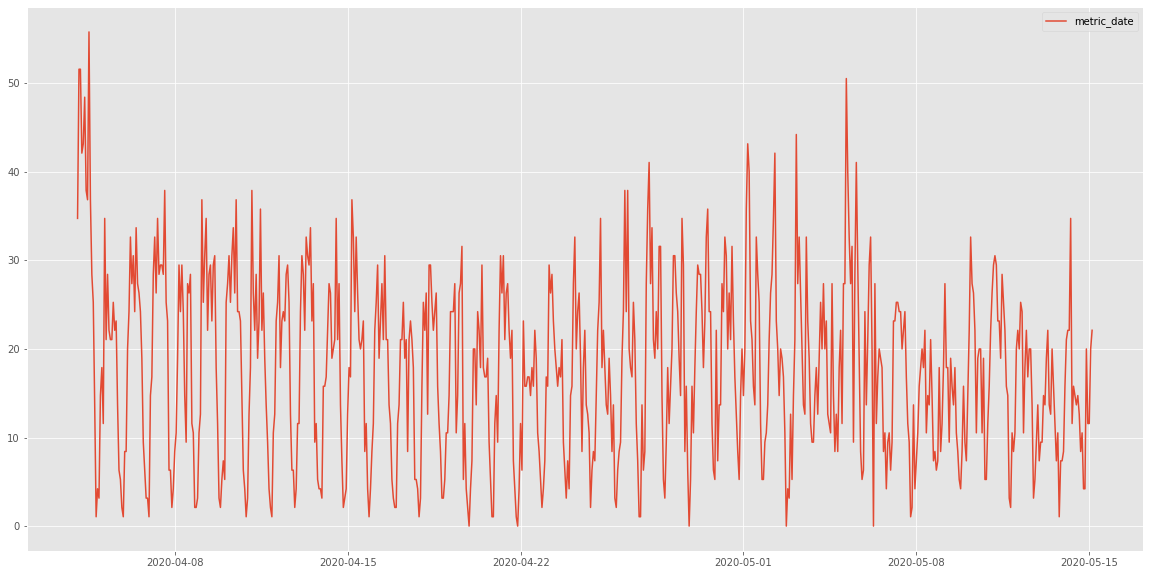

In [ ]:
metrics = MetricsList(metric_data)
metric = metrics[0]
plt.figure(figsize=(20, 10))
plt.plot(metric.metric_values.ds, metric.metric_values.y)
plt.legend(["metric_date"])
plt.show()


In [ ]:
df = metric.metric_values

In [ ]:
results = detect_ts(df, max_anoms=0.45, alpha=0.08, direction='both',only_last=None,longterm=True, piecewise_median_period_weeks=2)

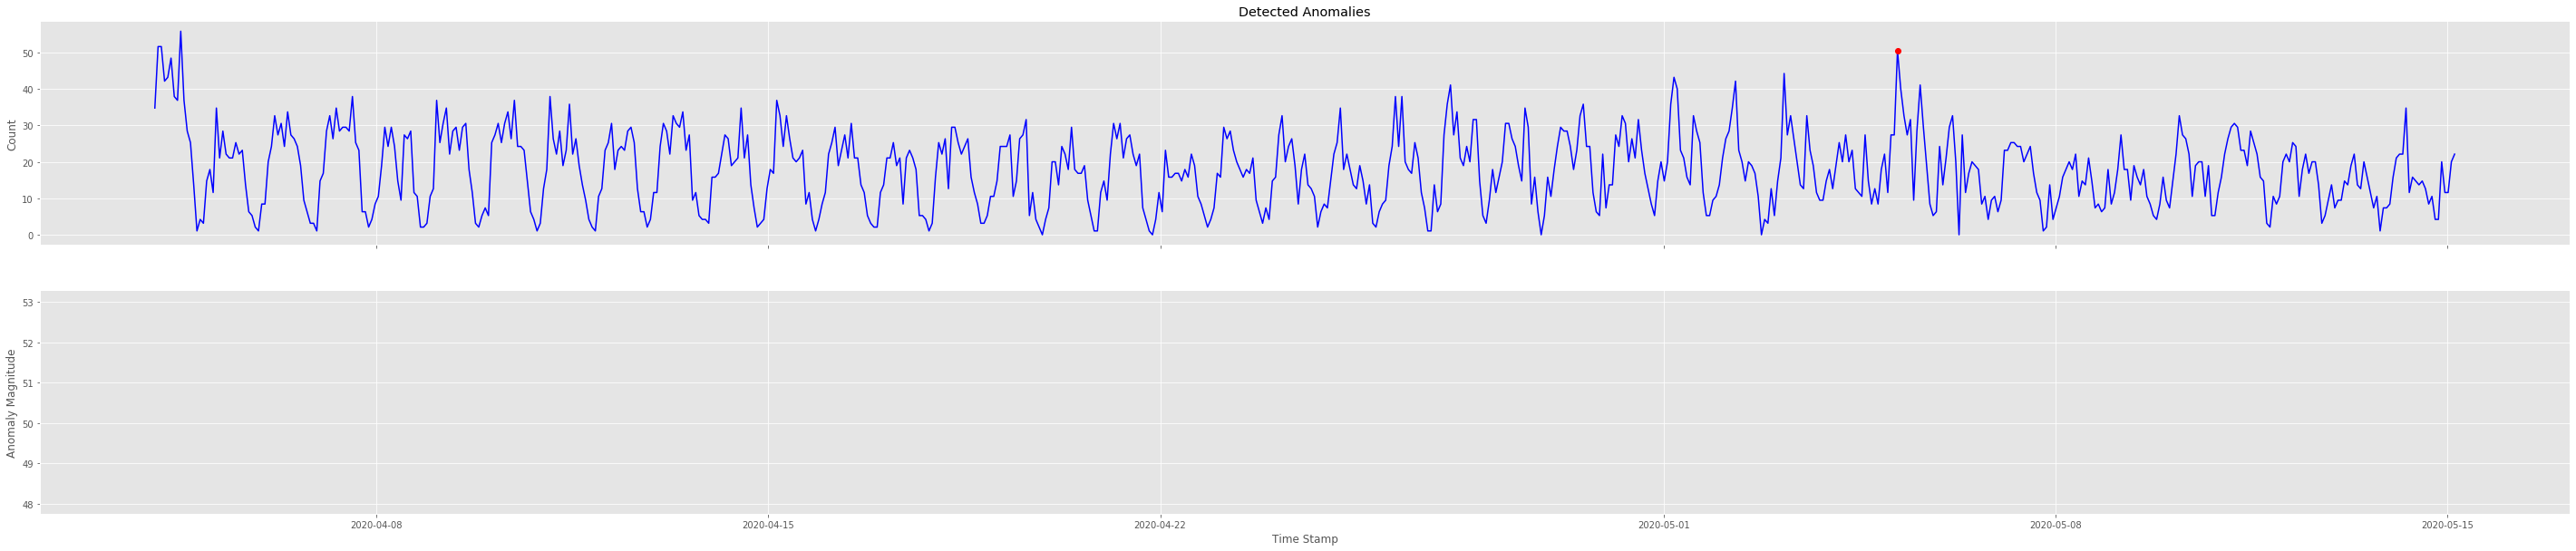

In [ ]:
# # format the twitter data nicely
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', drop=True)
# make a nice plot
f, ax = plt.subplots(2, 1, sharex=True,figsize=(50, 10))
ax[0].plot(df['timestamp'], df['value'], 'b')
ax[0].plot(results['anoms'].index, results['anoms']['anoms'], 'ro')
ax[0].set_title('Detected Anomalies')
ax[1].set_xlabel('Time Stamp')
ax[0].set_ylabel('Count')
ax[1].plot(results['anoms'].index, results['anoms']['anoms'], 'b')
ax[1].set_ylabel('Anomaly Magnitude')
plt.show()